# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import FeatureAgglomeration, KMeans
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv("bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,4/11/2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,11/4/2024 8:08
1,TX000002,AC00455,376.24,6/27/2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,11/4/2024 8:09
2,TX000003,AC00019,126.29,7/10/2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,11/4/2024 8:07
3,TX000004,AC00070,184.50,5/5/2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,11/4/2024 8:09
4,TX000005,AC00411,13.45,10/16/2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,11/4/2024 8:06


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

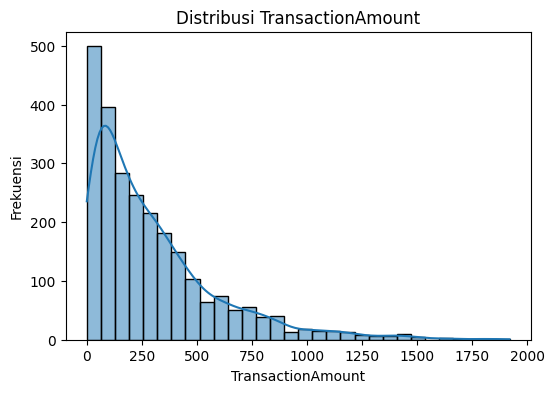

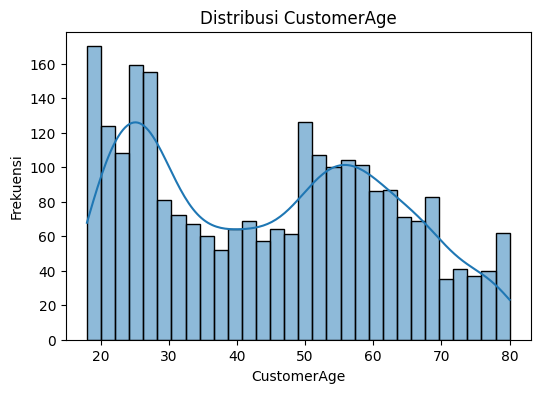

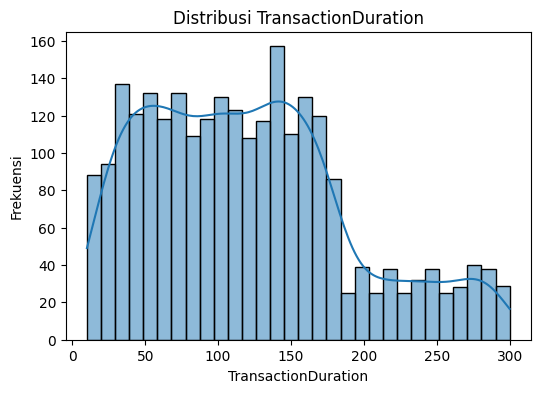

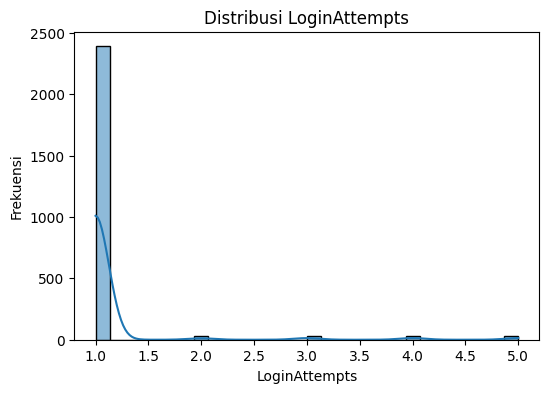

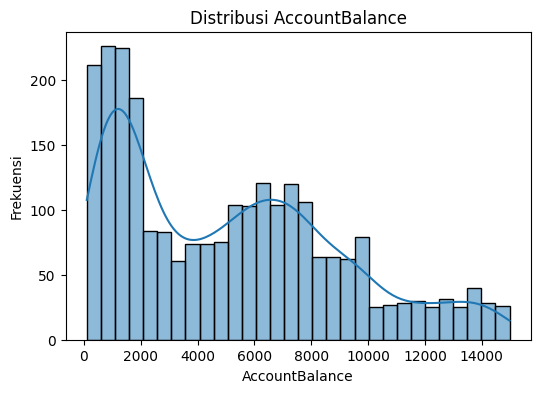

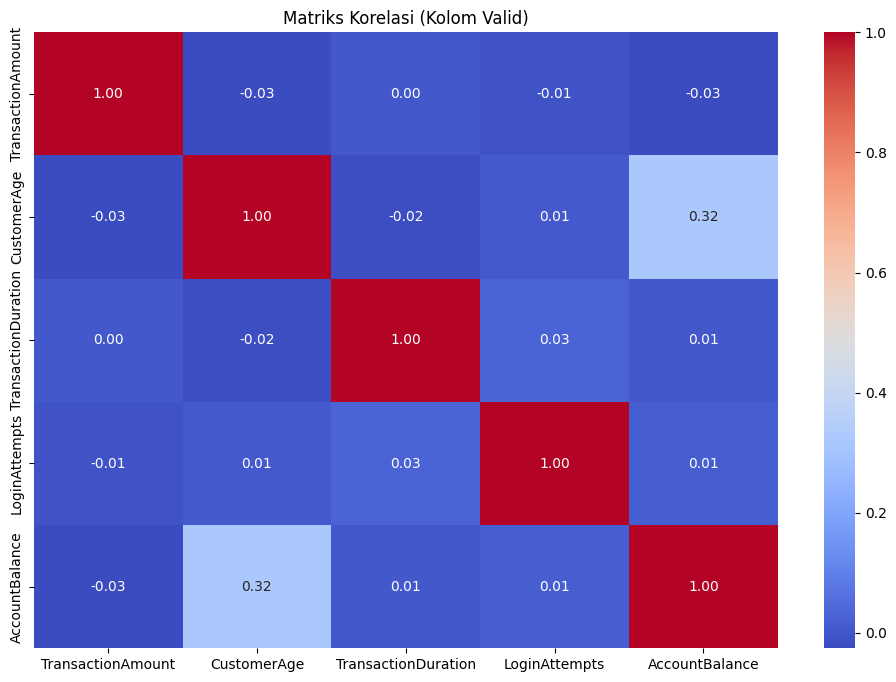


Kolom `TransactionID` memiliki terlalu banyak kategori (2512). Menampilkan hanya 15 teratas.


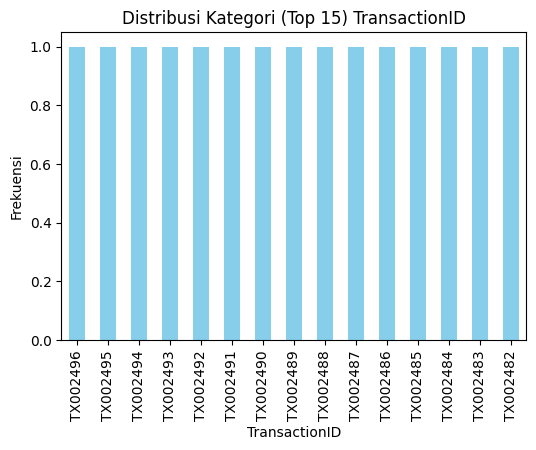


Kolom `AccountID` memiliki terlalu banyak kategori (495). Menampilkan hanya 15 teratas.


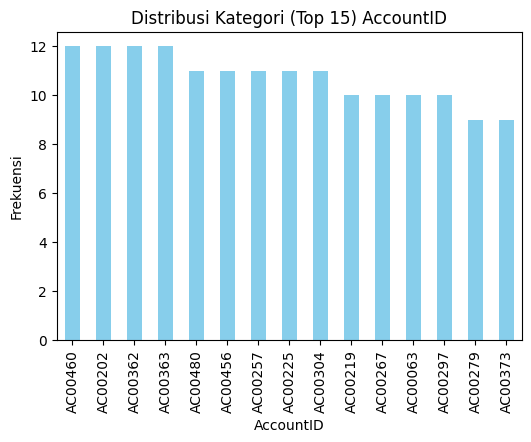


Kolom `TransactionDate` memiliki terlalu banyak kategori (2405). Menampilkan hanya 15 teratas.


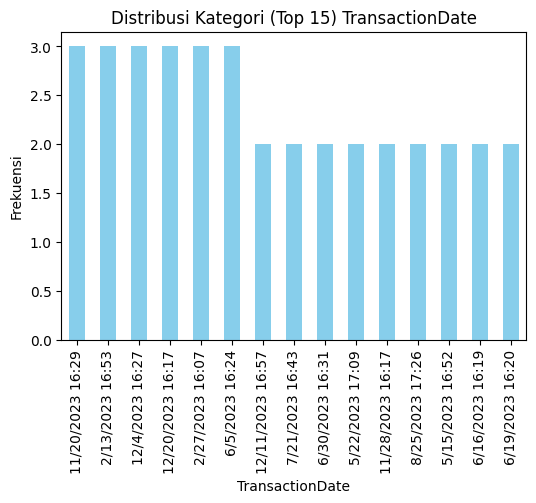

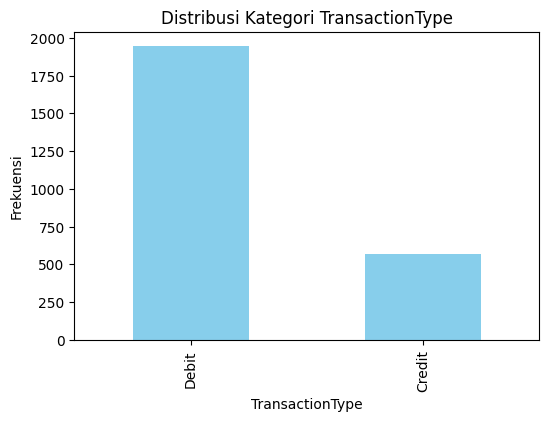


Kolom `Location` memiliki terlalu banyak kategori (43). Menampilkan hanya 15 teratas.


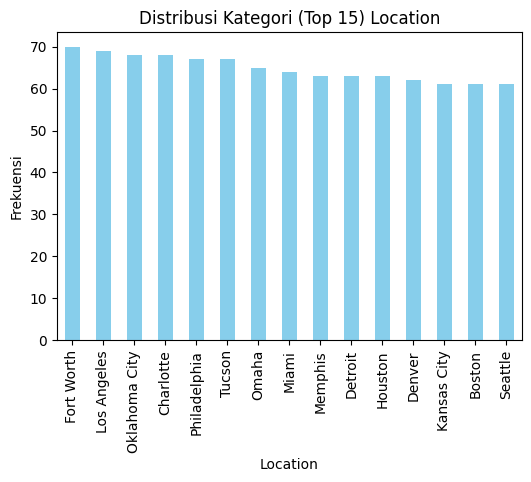


Kolom `DeviceID` memiliki terlalu banyak kategori (681). Menampilkan hanya 15 teratas.


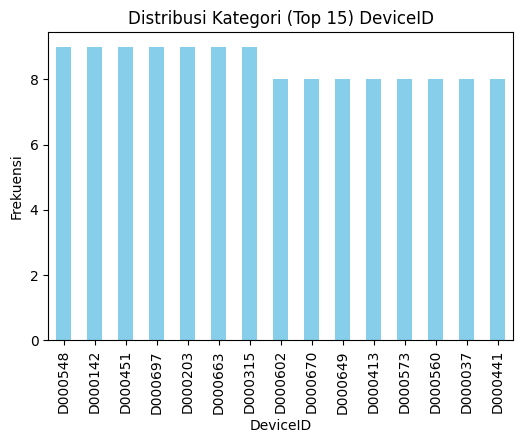


Kolom `IP Address` memiliki terlalu banyak kategori (592). Menampilkan hanya 15 teratas.


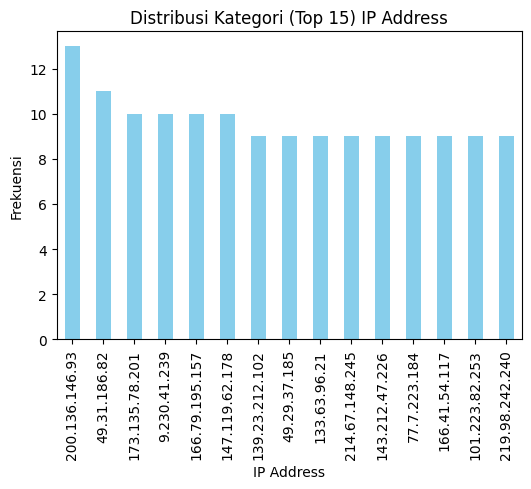


Kolom `MerchantID` memiliki terlalu banyak kategori (100). Menampilkan hanya 15 teratas.


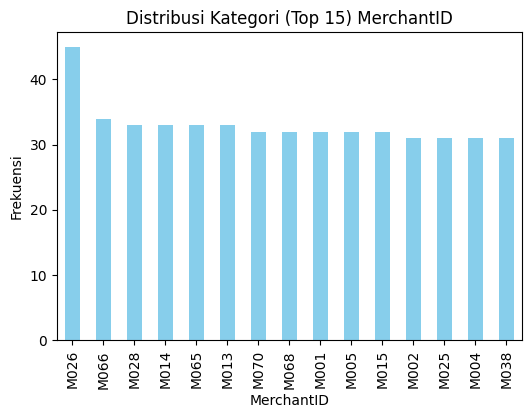

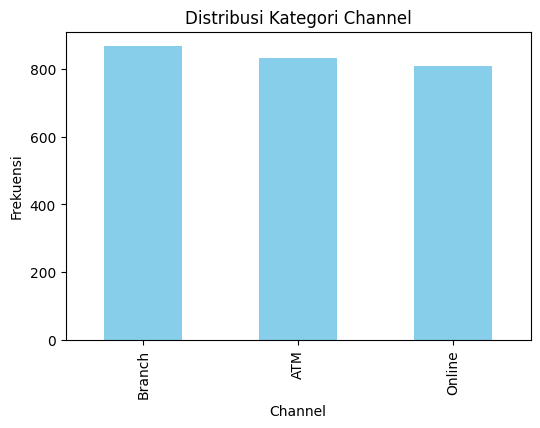

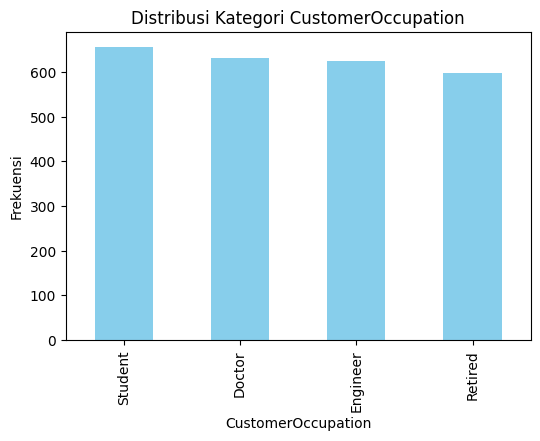

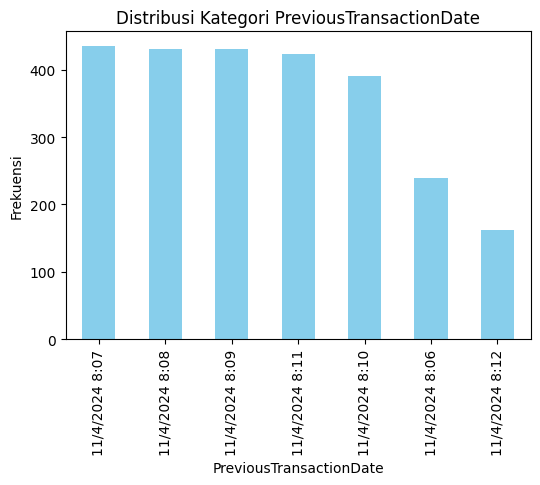

In [ ]:
df_info = df.info()

# 1. Memahami Struktur Data
print("\nJumlah Baris dan Kolom:")
print(df.shape)
print("\nJenis Data pada Setiap Kolom:")
print(df.dtypes)

# 2 Menangani Data yang Hilang
print("\nData yang Hilang pada Setiap Kolom (Sebelum Penanganan):")
missing_values_before = df.isnull().sum()
print(missing_values_before)

# Mengecek duplikasi dalam dataset
print("\nJumlah Data Duplikat:", df.duplicated().sum())

#3. Analisis Distribusi dan Korelasi
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Visualisasi Distribusi Numerikal (Histogram)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Matriks Korelasi
# Filter kolom numerikal
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Menghapus kolom yang seluruh nilainya NaN
valid_numerical_cols = df[numerical_cols].dropna(axis=1, how='all').columns

# Hapus kolom dengan variansi nol (tidak ada variasi data)
valid_numerical_cols = [
    col for col in valid_numerical_cols if df[col].nunique() > 1
]

if valid_numerical_cols:  # Cek jika ada kolom valid yang tersisa
    # Hitung matriks korelasi hanya pada kolom valid
    correlation_matrix = df[valid_numerical_cols].corr()

    # Plot heatmap matriks korelasi
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matriks Korelasi (Kolom Valid)")
    plt.show()
else:
    print("Tidak ada kolom numerikal valid untuk menghitung korelasi.")

  # 4. Visualisasi Data Kategorikal dengan Batas Maksimal Kategori
max_unique_values = 15  # Maksimal jumlah kategori yang divisualisasikan
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = df[col].nunique()
    if unique_values > max_unique_values:
        print(f"\nKolom `{col}` memiliki terlalu banyak kategori ({unique_values}). Menampilkan hanya {max_unique_values} teratas.")
        top_categories = df[col].value_counts().nlargest(max_unique_values)
        plt.figure(figsize=(6, 4))
        top_categories.plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori (Top {max_unique_values}) {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Missing Values Setelah Diisi:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Jumlah Baris Setelah Menghapus Duplikat: 2512

Data Numerikal Setelah Normalisasi/Standarisasi:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -1.994061     1.245125            -0.251275      -0.214735   
1           0.646895     1.177373             0.525301      -0.214735   
2          -0.244470    -1.759013            -0.765592      -0.214735   
3           0.064507    -1.047417            -1.875714      -0.214735   
4          -2.029619    -1.0474

<ipython-input-178-8dd324021bc8>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4.26267988 4.2341065  2.99573227 ... 4.04305127 3.17805383 3.21887582]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, numerical_cols] = np.log1p(df[numerical_cols])
<ipython-input-178-8dd324021bc8>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4.40671925 4.95582706 4.04305127 ... 4.99043259 2.99573227 4.54329478]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, numerical_cols] = np.log1p(df[numerical_cols])
<ipython-input-178-8dd324021bc8>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69314718 0.69314718 0.69314718 ... 0.69314718 0.69314718 0.69314718]' has dtype incompatible w

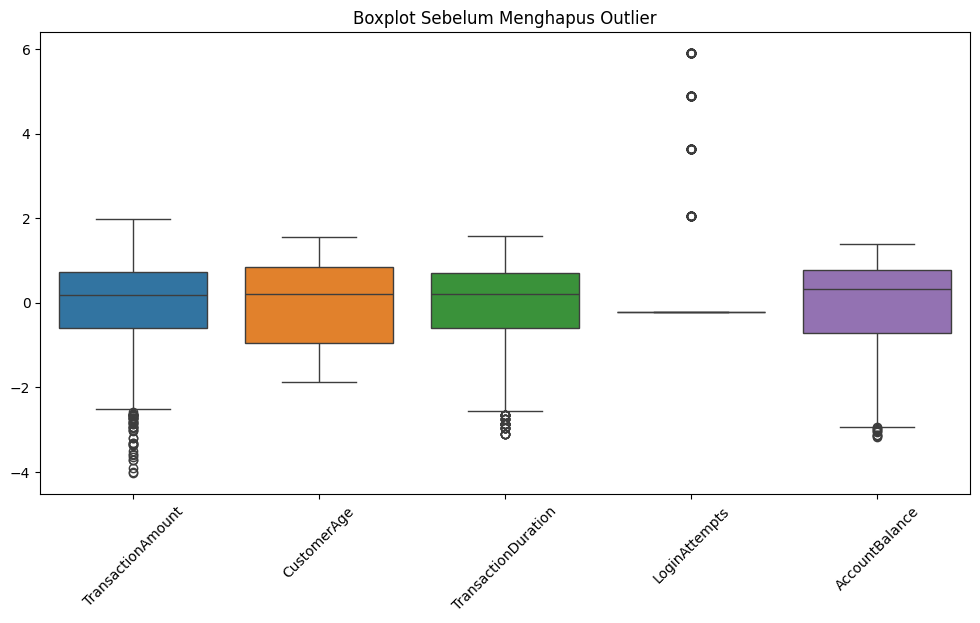


Jumlah Outlier Teridentifikasi: 213
Jumlah Baris Setelah Menghapus Outlier: 2299


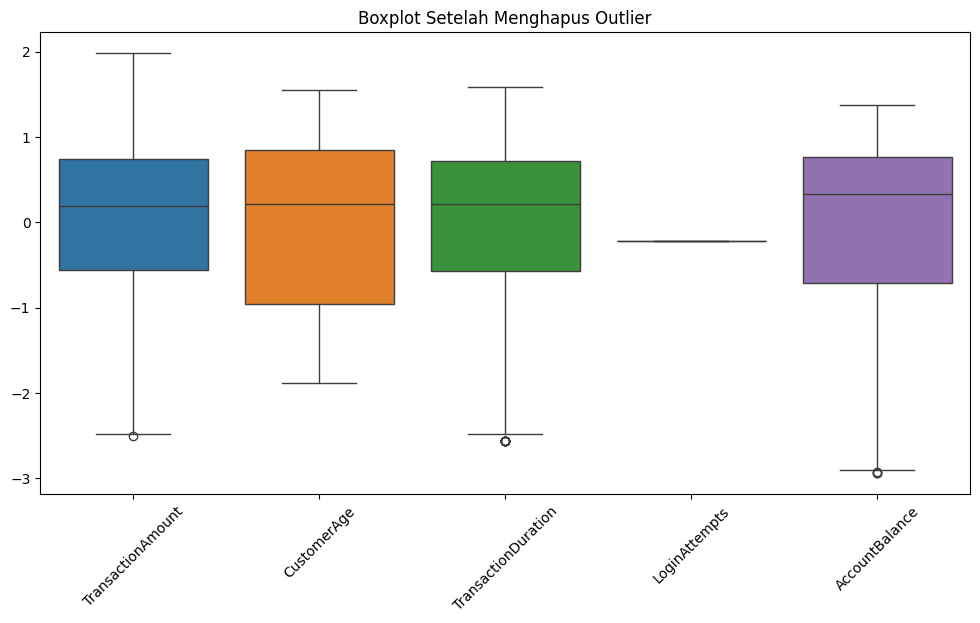

In [ ]:
# 1. Menampilkan missing values setelah diisi (asumsi sudah diisi)
print("Missing Values Setelah Diisi:")
print(df.isnull().sum())

# 2. Menghapus Data Duplikat
df.drop_duplicates(inplace=True)
print("\nJumlah Baris Setelah Menghapus Duplikat:", df.shape[0])

# 3. Normalisasi atau Standarisasi Fitur
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df.loc[:, numerical_cols] = np.log1p(df[numerical_cols])
scaler = StandardScaler()
df.loc[:, numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\nData Numerikal Setelah Normalisasi/Standarisasi:")
print(df[numerical_cols].head())

# 4. Deteksi dan Penanganan Outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Sebelum Menghapus Outlier")
plt.show()

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nJumlah Outlier Teridentifikasi:", outliers.sum())

# Hapus outlier langsung dari df
df = df.loc[~outliers]
print("Jumlah Baris Setelah Menghapus Outlier:", df.shape[0])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

# 5. Preprocessing Data untuk Clustering
features = ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge',
            'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Encode data kategorikal
le = LabelEncoder()
df.loc[:, 'TransactionType'] = le.fit_transform(df['TransactionType'])
df.loc[:, 'Location'] = le.fit_transform(df['Location'])
df.loc[:, 'Channel'] = le.fit_transform(df['Channel'])
df.loc[:, 'CustomerOccupation'] = le.fit_transform(df['CustomerOccupation'])

# Data untuk clustering
df_preprocessed = df[features]

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df.loc[:, 'Cluster'] = kmeans.fit_predict(df_preprocessed)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah klaster: 2, Silhouette Score: 0.5796290006679997 - Disimpan
Jumlah klaster: 3, Silhouette Score: 0.49572811445777354 - Tidak Disimpan
Jumlah klaster: 4, Silhouette Score: 0.45043866067800903 - Tidak Disimpan
Jumlah klaster: 5, Silhouette Score: 0.40694367117207114 - Tidak Disimpan
Jumlah klaster: 6, Silhouette Score: 0.3571077874434601 - Tidak Disimpan
Jumlah klaster: 7, Silhouette Score: 0.32182138733301485 - Tidak Disimpan
Jumlah klaster: 8, Silhouette Score: 0.29053428704955575 - Tidak Disimpan
Jumlah klaster: 9, Silhouette Score: 0.2611950420269244 - Tidak Disimpan
Jumlah klaster: 10, Silhouette Score: 0.2572159866262788 - Tidak Disimpan


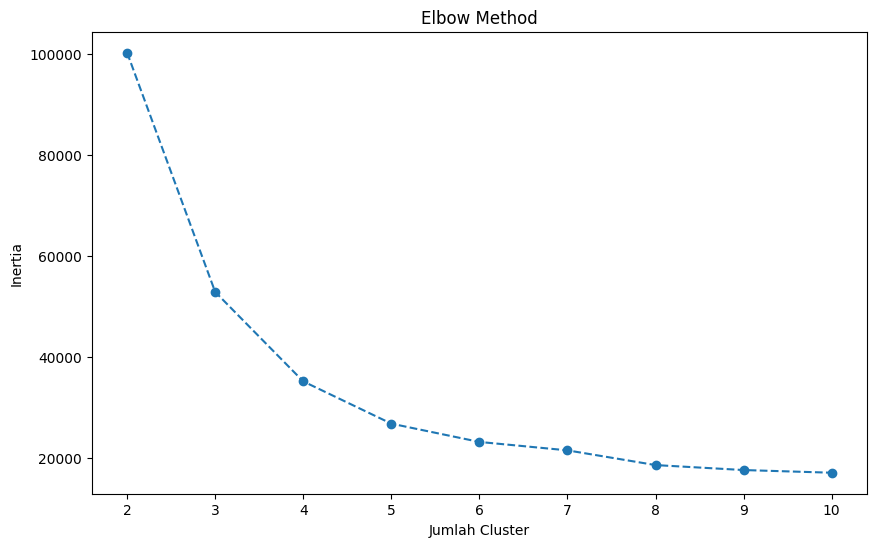

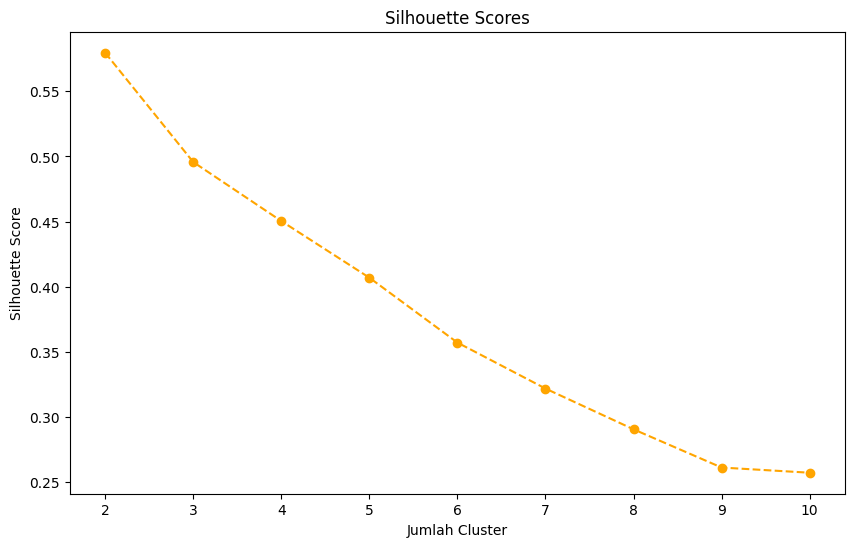


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [ ]:
# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Uji jumlah cluster dari 2 hingga 10

# Variabel untuk menyimpan label klaster yang valid
valid_cluster_labels = []

for n_clusters in range_n_clusters:
    # Melakukan klasterisasi KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_preprocessed)

    # Menghitung Silhouette Score untuk hasil klasterisasi
    silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)

    # Simpan inertia (SSE) untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Hitung silhouette score
    score = silhouette_score(df_preprocessed, cluster_labels)
    silhouette_scores.append(score)

    # Jika Silhouette Score >= 0.55, simpan label klaster
    if silhouette_avg >= 0.55:
        valid_cluster_labels.append(cluster_labels)
        print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg} - Disimpan")
    else:
        print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg} - Tidak Disimpan")

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

# Pilih jumlah cluster optimal berdasarkan evaluasi
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena range dimulai dari 2
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_n_clusters}")

In [ ]:
# Menghitung silhouette score original (untuk n=2, seluruh fitur)
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur (n=2)
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

Silhouette Score Tanpa Feature Selection: 0.5796290006679997


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# 1. Skala Data
scaler = RobustScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# 2. Optimasi Parameter untuk Feature Agglomeration, SelectKBest, dan PCA
best_silhouette = -1
best_agglo_n = None
best_k = None
best_n_components = None

# Eksperimen dengan berbagai kombinasi parameter
for agglo_n in range(2, min(9, clustering_data_scaled.shape[1] + 1)):  # Menguji n_clusters dari 2 hingga 8 atau maks fitur
    # Feature Agglomeration
    agglo = FeatureAgglomeration(n_clusters=agglo_n)
    clustering_data_agglo = agglo.fit_transform(clustering_data_scaled)


    dummy_target = KMeans(n_clusters=2, random_state=42).fit_predict(clustering_data_agglo)

    # SelectKBest
    for k in range(2, min(5, clustering_data_agglo.shape[1] + 1)):  # Uji k dari 2 hingga 4 atau maks fitur
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
        clustering_data_selected = selector.fit_transform(clustering_data_agglo, dummy_target)

        # PCA
        for n_comp in [1, 2]:  # Uji n_components=1 atau 2
            if clustering_data_selected.shape[1] > n_comp:  # memastikan n_components valid
                pca = PCA(n_components=n_comp)
                clustering_data_pca = pca.fit_transform(clustering_data_selected)

                # Clustering dengan KMeans
                kmeans_after = KMeans(n_clusters=2, n_init=50, random_state=42)
                kmeans_labels = kmeans_after.fit_predict(clustering_data_pca)
                silhouette_after = silhouette_score(clustering_data_pca, kmeans_labels)

                print(f"agglo_n={agglo_n}, k={k}, n_components={n_comp}, Silhouette Score={silhouette_after:.4f}")

                if silhouette_after > best_silhouette:
                    best_silhouette = silhouette_after
                    best_agglo_n = agglo_n
                    best_k = k
                    best_n_components = n_comp

# 3. Hasil Terbaik
print(f"\nKombinasi Terbaik:")
print(f"Feature Agglomeration (n_clusters={best_agglo_n}), SelectKBest (k={best_k}), PCA (n_components={best_n_components})")
print(f"Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: {best_silhouette:.4f}")

agglo_n=2, k=2, n_components=1, Silhouette Score=0.6284
agglo_n=3, k=2, n_components=1, Silhouette Score=0.6131
agglo_n=3, k=3, n_components=1, Silhouette Score=0.6001
agglo_n=3, k=3, n_components=2, Silhouette Score=0.3599
agglo_n=4, k=2, n_components=1, Silhouette Score=0.7078
agglo_n=4, k=3, n_components=1, Silhouette Score=0.6765
agglo_n=4, k=3, n_components=2, Silhouette Score=0.4392
agglo_n=4, k=4, n_components=1, Silhouette Score=0.6509
agglo_n=4, k=4, n_components=2, Silhouette Score=0.4189

Kombinasi Terbaik:
Feature Agglomeration (n_clusters=4), SelectKBest (k=2), PCA (n_components=1)
Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: 0.7078


In [ ]:
# Hasil Perbandingan
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original:.4f}")
print(f"Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: {best_silhouette:.4f}")

# Perubahan skor
score_difference = best_silhouette - silhouette_score_original
print("\nPerbandingan Performa:")
print(f"Perubahan: {score_difference:.4f}")



Silhouette Score Tanpa Feature Selection: 0.5796
Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: 0.7078

Perbandingan Performa:
Perubahan: 0.1282


Untuk submission ini saya sudah mencoba untuk menggunakan RFE, PCA,Variance Threshold & Korelasi,RFE + PCA, Feature Importance dari RandomForest, dan mencoba mengganti metode dengan menggunakan Agglomerative Clustering, DBSCAN, PCA+SelcetKBest

Dan didapatkan bahwa Feature Agglomeration + SelectKBest + PCA mendapatkan silhouette nya **0.7078**

## **d. Visualisasi Hasil Clustering**

In [ ]:
print("Kolom dalam Dataset:")
print(df.columns)

Kolom dalam Dataset:
Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'Cluster'],
      dtype='object')


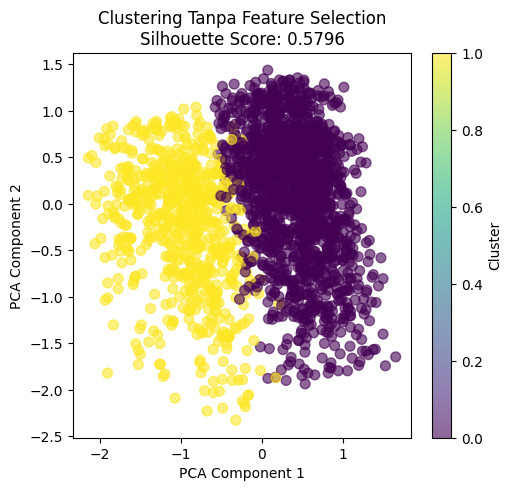

In [ ]:
clustering_data = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']]

# 1. Skala Data
scaler = RobustScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# --- Visualisasi Tanpa Feature Selection ---
kmeans_original = KMeans(n_clusters=2, n_init=50, random_state=42)
labels_original = kmeans_original.fit_predict(clustering_data_scaled)

# Reduksi dimensi untuk visualisasi (PCA ke 2D)
pca_2d = PCA(n_components=2)
data_pca_original = pca_2d.fit_transform(clustering_data_scaled)

# Scatter plot untuk clustering tanpa feature selection
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_pca_original[:, 0], data_pca_original[:, 1], c=labels_original, cmap='viridis', s=50, alpha=0.6)
plt.title(f'Clustering Tanpa Feature Selection\nSilhouette Score: {silhouette_score_original:.4f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

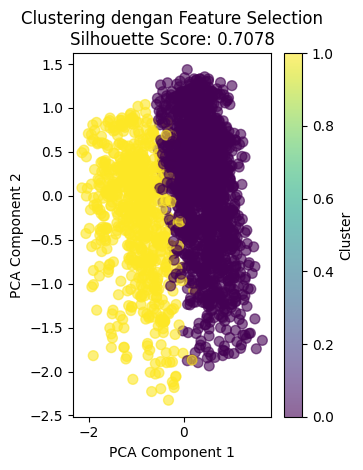

In [ ]:
# Untuk visualisasi 2D, gunakan PCA lagi ke 2 komponen
pca_2d_after = PCA(n_components=2)
data_pca_after = pca_2d_after.fit_transform(clustering_data_selected)

labels_after = kmeans_after.fit_predict(clustering_data_selected)
# Scatter plot untuk clustering dengan feature selection
plt.subplot(1, 2, 2)
plt.scatter(data_pca_after[:, 0], data_pca_after[:, 1], c=labels_after, cmap='viridis', s=50, alpha=0.6)
plt.title(f'Clustering dengan Feature Selection\nSilhouette Score: {best_silhouette:.4f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# Tampilkan plot
plt.tight_layout()
plt.show()

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here
# Menambahkan hasil label cluster ke DataFrame yang sudah dinormalisasi
df['Cluster'] = kmeans_after.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
scaler = StandardScaler()
scaler.fit(df[numerical_cols])

# Inverse transform
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
df[numerical_cols] = np.expm1(df[numerical_cols])

# Tampilkan hasil
print("Data Numerikal Setelah Inverse Transform:")
print(df[numerical_cols].head())

Data Numerikal Setelah Inverse Transform:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.833819     2.482507            -0.175972      -0.349146   
1           0.918286     2.254365             0.703192      -0.349146   
2          -0.159845    -0.827357            -0.490542      -0.349146   
3           0.118526    -0.648272            -0.819552      -0.349146   
4          -0.839202    -0.648272             1.661080      -0.349146   

   AccountBalance  
0        0.488785  
1        2.620596  
2       -0.618078  
3        1.366906  
4        1.082323  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
df_original = df.copy()  # Dataset asli dengan data yang sudah diinversi

In [ ]:
# Agregasi untuk fitur numerik
numeric_agg = df.groupby('Cluster').agg({
    'TransactionAmount': ['min', 'max', 'mean'],
    'CustomerAge': ['min', 'max', 'mean'],
    'TransactionDuration': ['min', 'max', 'mean'],
    'AccountBalance': ['min', 'max', 'mean']
}).reset_index()

# Agregasi untuk fitur kategorikal
categorical_agg = df.groupby('Cluster').agg({
    'TransactionType': lambda x: x.mode()[0],
    'Location': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0],
    'CustomerOccupation': lambda x: x.mode()[0]
}).reset_index()

# Tampilkan hasil agregasi
print("Agregasi Numerik per Cluster:")
print(numeric_agg)
print("\nAgregasi Kategorikal per Cluster:")
print(categorical_agg)

Agregasi Numerik per Cluster:
  Cluster TransactionAmount                     CustomerAge            \
                        min       max      mean         min       max   
0       0         -0.896622  5.606384  0.492546   -0.847129  3.759837   
1       1         -0.889789  5.192167  0.552250   -0.847129  2.367318   

            TransactionDuration                     AccountBalance            \
       mean                 min       max      mean            min       max   
0  0.989137           -0.905037  3.599207  0.474444      -0.658499  2.907295   
1 -0.557032           -0.905037  3.579014  0.513119      -0.944594  0.761275   

             
       mean  
0  0.897451  
1 -0.638973  

Agregasi Kategorikal per Cluster:
   Cluster  TransactionType  Location  Channel  CustomerOccupation
0        0                1        15        1                   2
1        1                1        20        0                   3



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Jumlah Transaksi (TransactionAmount):**
  - Minimum: -0.896622
  - Maksimum: 5.606384
  - Rata-rata: 0.492546
- **Usia Pelanggan (CustomerAge):**
  - Minimum: -0.847129
  - Maksimum: 3.759837
  - Rata-rata: 0.989137
  
- **Durasi Transaksi (TransactionDuration):**
  - Minimum: -0.905037
  - Maksimum: 3.599207
  - Rata-rata: 0.474444

- **Saldo Akun (AccountBalance):**
  - Minimum: -0.658499
  - Maksimum: 2.907295
  - Rata-rata: 0.897451

- **Karakteristik Kategorikal:**
  - Tipe Transaksi Dominan: Debit (1)
  - Lokasi Dominan: 15 lokasi berbeda (contoh: San Diego, Houston)
  - Saluran Dominan: ATM (1)
  - Pekerjaan Dominan: Doctor/Engineer (2)

- **Analisis:** Cluster 0 terdiri dari pelanggan dengan jumlah transaksi yang bervariasi luas, dari sangat kecil hingga cukup besar, tetapi rata-ratanya moderat (0.492546 dalam skala standar). Usia pelanggan dalam cluster ini cenderung lebih tua (rata-rata 0.989137), yang menunjukkan bahwa mereka adalah kelompok yang lebih matang. Durasi transaksi mereka juga cukup signifikan (rata-rata 0.474444), yang mungkin mencerminkan transaksi yang lebih terencana atau kompleks, sering dilakukan melalui ATM (saluran dominan: 1). Saldo akun mereka cukup tinggi (rata-rata 0.897451), menunjukkan stabilitas finansial yang baik.

 Dari segi demografi, pelanggan dalam cluster ini didominasi oleh profesi seperti dokter atau insinyur (pekerjaan dominan: 2) dan lebih sering menggunakan ATM untuk bertransaksi. Mereka berasal dari 15 lokasi berbeda, yang menunjukkan distribusi geografis yang cukup beragam namun tidak terlalu luas dibandingkan Cluster 1. Hal ini menandakan bahwa mereka adalah kelompok profesional dengan kebiasaan transaksi rutin, kemungkinan untuk kebutuhan sehari-hari atau pengelolaan keuangan yang stabil.

  **Strategi yang bisa diterapkan:**
  1. Menawarkan layanan perbankan premium seperti tabungan berbunga tinggi atau investasi jangka panjang untuk memanfaatkan saldo akun yang tinggi dan stabilitas finansial mereka.
  2. Mengoptimalkan pengalaman di ATM dengan fitur tambahan seperti penarikan tanpa kartu atau promosi khusus untuk transaksi ATM.

## Cluster 1:
- **Jumlah Transaksi (TransactionAmount):**
  - Minimum: -0.889789
  - Maksimum: 5.192167
  - Rata-rata: 0.552250
- **Usia Pelanggan (CustomerAge):**
  - Minimum: -0.847129
  - Maksimum: 2.367318
  - Rata-rata: -0.557032
  
- **Durasi Transaksi (TransactionDuration):**
  - Minimum: -0.905037
  - Maksimum: 3.579014
  - Rata-rata: 0.513119

- **Saldo Akun (AccountBalance):**
  - Minimum: -0.944594
  - Maksimum: 0.761275
  - Rata-rata: -0.638973

- **Karakteristik Kategorikal:**
  - Tipe Transaksi Dominan: Debit (1)
  - Lokasi Dominan: 20 lokasi berbeda (contoh: Mesa, Memphis)
  - Saluran Dominan: Online (0)
  - Pekerjaan Dominan: Student (3)

- **Analisis:** Cluster 1 memiliki jumlah transaksi rata-rata yang sedikit lebih tinggi dibandingkan Cluster 0 (0.552250 dalam skala standar), dengan variasi yang cukup besar dari transaksi kecil hingga besar. Usia pelanggan dalam cluster ini jauh lebih muda (rata-rata -0.557032), yang konsisten dengan dominasi pelajar (pekerjaan dominan: 3). Durasi transaksi mereka juga signifikan (rata-rata 0.513119), tetapi saldo akun mereka rendah (rata-rata -0.638973), menunjukkan kapasitas finansial yang terbatas.

 Dari segi karakteristik kategorikal, pelanggan dalam cluster ini lebih sering bertransaksi secara online (saluran dominan: 0) dan berasal dari 20 lokasi berbeda, yang menunjukkan mobilitas dan fleksibilitas yang lebih tinggi dibandingkan Cluster 0. Dominasi pelajar sebagai pekerjaan utama mencerminkan gaya hidup digital dan kebiasaan transaksi yang cepat serta praktis. Meskipun mereka aktif bertransaksi, saldo akun yang rendah menunjukkan bahwa mereka mungkin bergantung pada pendapatan terbatas atau dukungan finansial dari pihak lain.

  **Strategi yang bisa diterapkan:**

  1. Menawarkan layanan perbankan digital yang hemat biaya, seperti promo cashback untuk transaksi online atau fitur budgeting di aplikasi mobile banking.
  2. Menyediakan produk keuangan yang ramah pelajar, seperti tabungan dengan setoran minimum rendah atau edukasi keuangan untuk membantu mereka mengelola saldo akun.

  **KESIMPULAN**
  
  Berdasarkan hasil clustering menggunakan metode KMeans, pelanggan dapat dikelompokkan ke dalam dua kategori utama dengan karakteristik yang berbeda. Cluster 0 terdiri dari pelanggan yang lebih tua, profesional (dokter/insinyur), dengan saldo akun tinggi dan kebiasaan transaksi rutin melalui ATM. Sementara itu, Cluster 1 mencakup pelanggan muda, mayoritas pelajar, dengan saldo akun rendah namun aktif bertransaksi secara online di berbagai lokasi. Perbedaan usia, saluran transaksi, dan kapasitas finansial ini memberikan wawasan penting bagi strategi layanan perbankan yang dapat disesuaikan untuk masing-masing kelompok.




# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan dataset ke dalam file CSV
output_file = 'Data_Cluster.csv'
df.to_csv(output_file, index=False)
print(f"Dataset telah berhasil disimpan ke file: {output_file}")

Dataset telah berhasil disimpan ke file: Data_Cluster.csv
